#### <span style ='color: blue'>Import the required libraries</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import warnings
warnings.filterwarnings(action = 'ignore')
%matplotlib inline 

loan_data = pd.read_csv('loan_data.csv')

In [2]:
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
loan_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


#### <span style = 'color: blue'> 1. Feature Transformation </span>

Transform categorical values into numerical values (discrete)

In [4]:
loan_data['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [5]:
loan_data = pd.get_dummies(loan_data, columns=['purpose'], prefix =['purpose'])

gc.collect()
loan_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


#### <span style = 'color: blue'> 2. Exploratory data analysis of different factors of the dataset.</span>

#### Check for balance / imbalance of target variable

In [6]:
loan_data['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

<span style = 'color: blue'>From above we can see some data imbalance, percentage of not_fully_paid i.e. defaults is significantly smaller than the no default case </span>

#### We will further dive into numerical and categorical variables for EDA

In [7]:
numerical_columns = []
categorical_columns = []

for column in loan_data.columns:
    if(len(loan_data[column].value_counts())>10):
        numerical_columns.append(column)
    else:
        categorical_columns.append(column)
categorical_columns

['credit.policy',
 'pub.rec',
 'not.fully.paid',
 'purpose_all_other',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_educational',
 'purpose_home_improvement',
 'purpose_major_purchase',
 'purpose_small_business']



<span style = 'color: blue'>Creating the scatter plot of numerical variables against target variable for EDA</span>

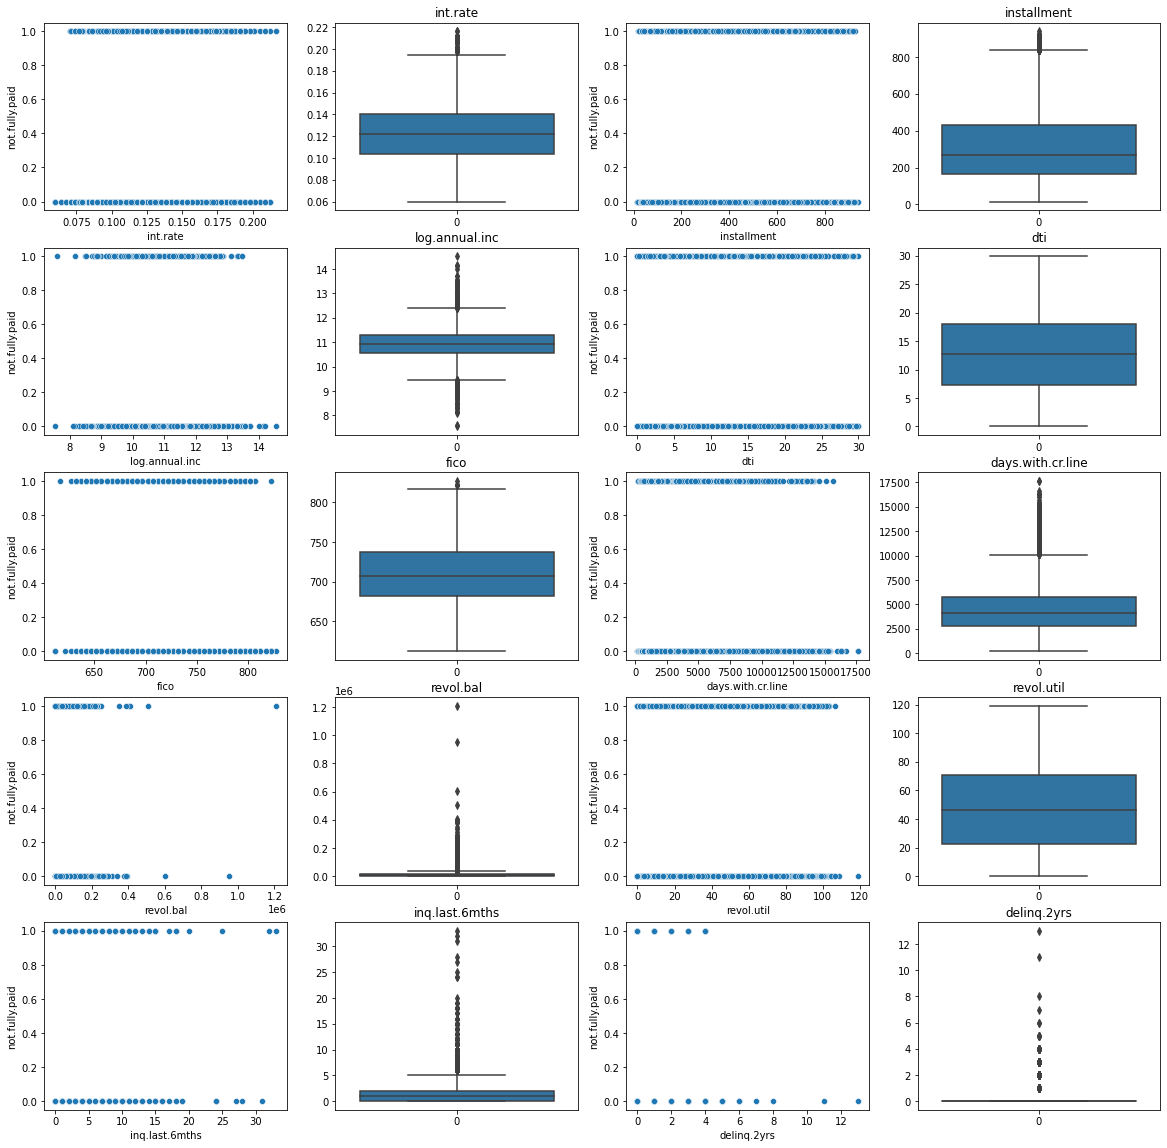

In [8]:
plt.figure(figsize=(20, 20))
count = 0

for column in numerical_columns:
    count = count + 1
    plt.subplot(5, 4, count)
    sns.scatterplot(data = loan_data, x=column, y='not.fully.paid')
    
    count = count + 1
    plt.subplot(5, 4, count)
    sns.boxplot(data=loan_data[column]).set(title=column)
    
plt.show()

<span style = 'color:blue'>The above charts indicate that the numerical data has a non-linear relationship with the target variable. Also, while there may be outliers, they could be important information for the model. We will need further investigation before we address it.</span>

#### Let's standardize the numerical columns and draw a correlation heatmap between the numerical features

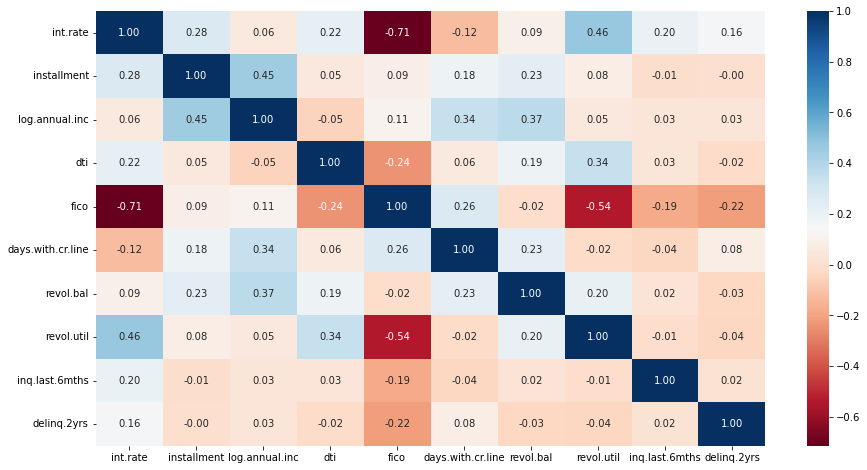

In [9]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

loan_data[numerical_columns] = ss.fit_transform(loan_data[numerical_columns])

plt.figure(figsize=(15,8))
sns.heatmap(loan_data[numerical_columns].corr(), annot = True, fmt = '0.2f', cmap = 'RdBu')
plt.show()

<span style = 'color:blue'>The heatmap indicates the feature fico has a high correlation with interest rate.</span>

#### Dropping fico from features

In [10]:
loan_data.drop(columns=['fico'], axis=1, inplace=True)

#### Let's investigate the categorical columns

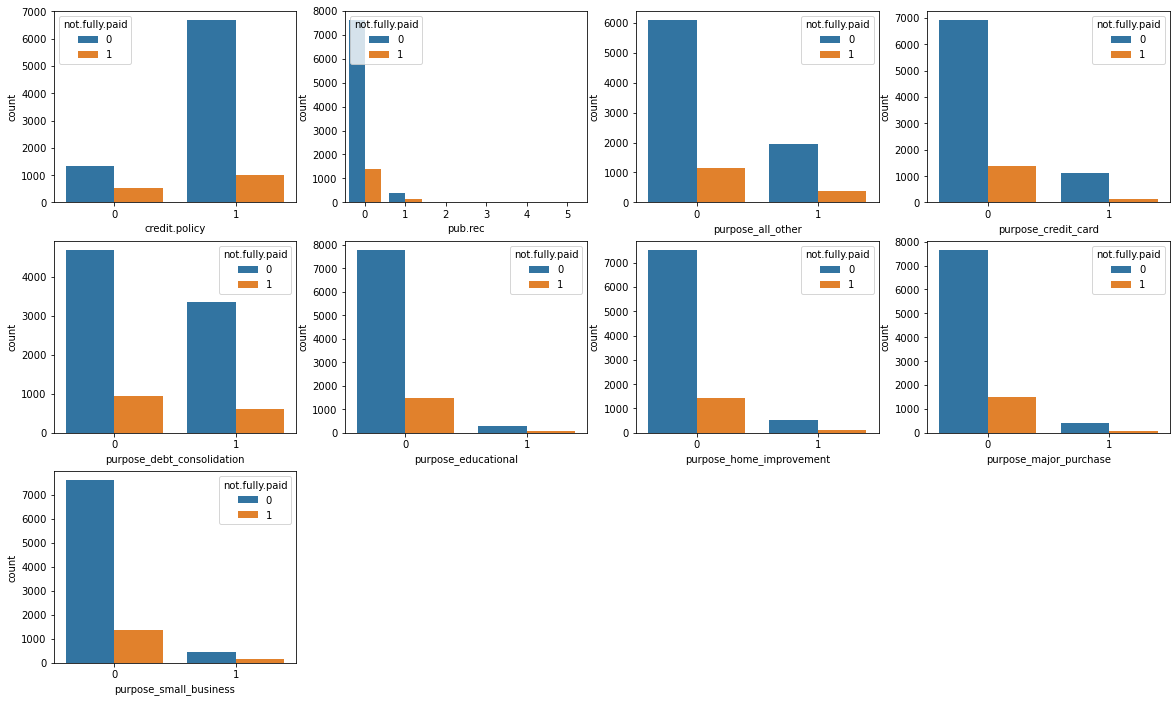

In [11]:
plt.figure(figsize=(20, 12))
count = 0

for column in categorical_columns:
    
    if column == 'not.fully.paid':
        continue
    
    count = count + 1
    plt.subplot(3, 4, count)
    sns.countplot(column, hue = 'not.fully.paid', data = loan_data)
    
plt.show()

<span style = 'color: blue'>The above chart do not reveal any unusual trend for defaults. What it does reveal is that the data is highly imbalanced, e.g. credit_policy = 1 is far greater in proportion to credit_policy = 0. Also, a large percentage of loans are not defaulted</span> 
    
<span style = 'color: blue'>The categorical variable pub.rec (borrower's number of derogatory public records) has to be investigated as it has got minimal data for records greater than 1</span> 

In [12]:
pd.crosstab(index = loan_data['pub.rec'], columns= loan_data['not.fully.paid'], margins = True)

not.fully.paid,0,1,All
pub.rec,,,
0,7624,1395,9019
1,397,136,533
2,17,2,19
3,5,0,5
4,1,0,1
5,1,0,1
All,8045,1533,9578


<span style = 'color:blue'>Since there are very limited samples for derogatory public records > 1, we impute them and for all public records greater than 1, we will set public records = 1. This will make this feature a one hot encoded feature.</span>

In [13]:
loan_data['public.record'] = loan_data['pub.rec'].apply(lambda x:0 if x == 0 else 1) 

loan_data.drop(columns=['pub.rec'], axis=1, inplace=True)

loan_data['public.record'].value_counts()

0    9019
1     559
Name: public.record, dtype: int64

#### We will build a learning model based on the available data


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x = loan_data.drop('not.fully.paid', axis = 1)
y = loan_data['not.fully.paid']

x_train, x_test, y_train, y_test = train_test_split(x, y)

del x, y, loan_data
gc.collect()

38820

#### Import tensorflow libraries

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras

#### Create the deep learning model using Keras with Tensorflow backend. 

The model has 3 layers, the output layer has a sigmoid activation function for binary classification, while input and hidden layers have a relu activation function.

The loss function used is binary_crossentropy as this is a binary classification problem

In [17]:
model = Sequential([
    Dense(64, activation='relu', input_shape = [len(x_train.keys())]),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid') 
])


model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1216      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,441
Trainable params: 5,441
Non-trainable params: 0
_________________________________________________________________


The PrintDot class below is a callback class which simply prints a dot at the end of each epoch. This is designed to provide a feedback to the user that the program is still running as model.fit function is used with verbose = 0 parameter. 

Also, an early_stop callback is being used to ensure that the model does not overfit after running too many epochs. So if validation loss starts worsening, then the model stops after being patient for 25 epochs

In [18]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0 : print(epoch)
        print ('.', end = '')

EPOCHS = 1000

#Early stop parameter provided to prevent model overfitting
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 25)

history = model.fit(
    x_train, y_train, epochs = EPOCHS, validation_split = 0.2, 
    verbose = 0, callbacks = [early_stop, PrintDot()]
)

'''
history = model.fit(
    x_train, y_train, epochs = EPOCHS, validation_split = 0.2, 
    verbose = 1
)
'''

0
.............................

'\nhistory = model.fit(\n    x_train, y_train, epochs = EPOCHS, validation_split = 0.2, \n    verbose = 1\n)\n'

Using model.evaluate function below to compute final accuracy of the model in the test dataset

In [19]:
model.evaluate(x_test, y_test, verbose = 2)

75/75 - 0s - loss: 0.4552 - accuracy: 0.8196 - 87ms/epoch - 1ms/step


[0.455214262008667, 0.8196242451667786]

#### <span style = 'color:blue'>From the above evaluation, we can see that the model is predicting with an accuracy of approx. 82%</span>